In [2]:
import os
import json
import time

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.5f}'.format

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [3]:
signal = [0 for i in range(5000)]
df = pd.DataFrame()
df['signal'] = signal
df.loc[1000:1700] = 50
df.loc[2500:2800] = 50
df.loc[3000:4500] = 50
        
def generate_downlink(start, end, width, height, up):
    for i in range(start, end, width):
        if up:
            up = False
            df.loc[i:i+width] = height + 5
        else:
            up = True
            df.loc[i:i+width] = height - 5

generate_downlink(1100, 1490, 30, 50, up=True)
generate_downlink(2600, 2750, 30, 50, up=True)
generate_downlink(3100, 3430, 30, 50, up=True)
generate_downlink(3830, 4160, 30, 50, up=True)

generate_downlink(1190, 1250, 60, 50, up=False)
generate_downlink(1370, 1430, 60, 50, up=False)
generate_downlink(3920, 3980, 60, 50, up=False)

<AxesSubplot:xlabel='Time in seconds', ylabel='Device RPM'>

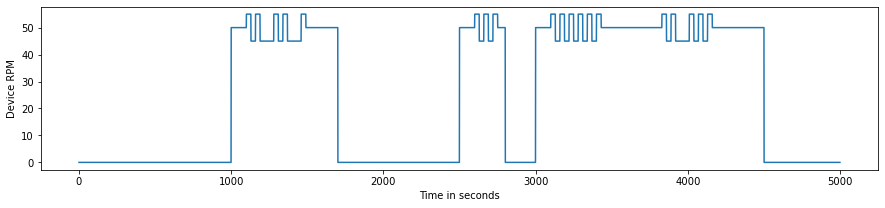

In [4]:
%matplotlib inline
plt.figure(figsize=(15,3))
plt.xlabel('Time in seconds')
plt.ylabel('Device RPM')
df['rpm'].plot()

In [12]:
df['signal_changed'] = ((df['signal'] != 0) & (df['signal'].diff() > 0)).astype(int)
df['change_num'] = df['signal_changed'].cumsum().astype(int)
df['change_counts_width'] = df['signal_changed'].rolling((2*60), center=False).sum()
df['change_counts_width_reverse'] = df[::-1]['signal_changed'].rolling((2*60), center=False).sum()[::-1]
df['downlink'] = ((df['change_counts_width'] > 0) & (df['change_counts_width_reverse'] > 0)).astype(int)
df['downlink_num'] = (df['downlink'].astype(int).diff() == 1).cumsum() 
df['high_point'] = df[df['downlink'] == 1].groupby('downlink_num').transform('max')['rpm']
df['low_point'] = df[df['downlink'] == 1].groupby('downlink_num').transform('min')['rpm']
df['index'] = df.index
df['change_num_index'] = np.where((df['change_num'].diff() != 0), df['index'], np.nan)
df['change_num_index'].ffill(inplace=True)
df['change_num_index_diff'] = df['change_num_index'].diff()
df['bit_length'] = np.where((df['change_num_index_diff'] >= 30) & 
                            (df['change_num_index_diff'] <= 60), df['change_num_index_diff'], 0)

<Figure size 1080x216 with 0 Axes>

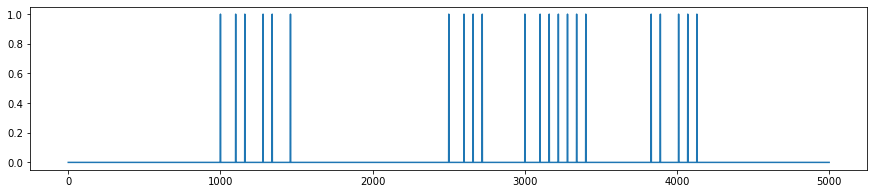

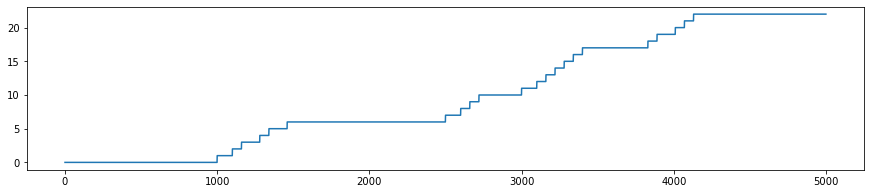

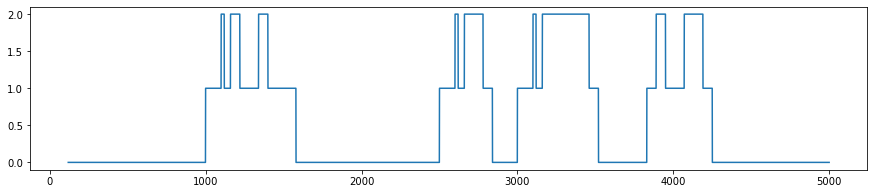

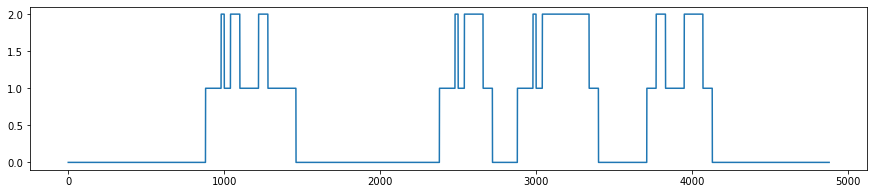

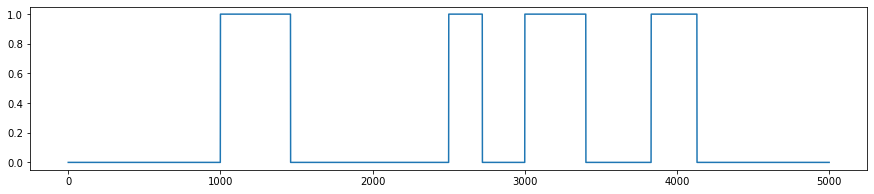

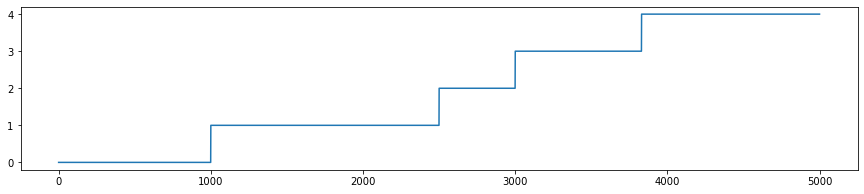

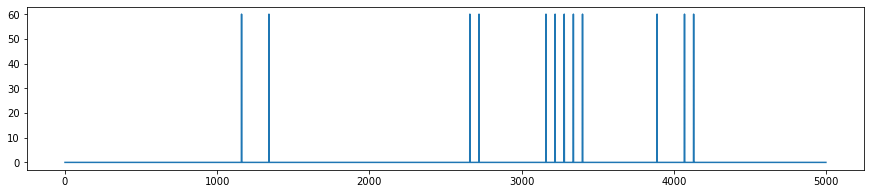

<Figure size 1080x216 with 0 Axes>

In [13]:
%matplotlib inline

plt.figure(figsize=(15,3))
df['rpm_changed'].plot()
plt.figure(figsize=(15,3))
df['change_num'].plot()
plt.figure(figsize=(15,3))
df['change_counts_downlink_width'].plot()
plt.figure(figsize=(15,3))
df['change_counts_downlink_width_reverse'].plot()
plt.figure(figsize=(15,3))
df['downlink'].plot()
plt.figure(figsize=(15,3))
df['downlink_num'].plot()
plt.figure(figsize=(15,3))
df['bit_length'].plot()
plt.figure(figsize=(15,3))